In [1]:
from functools import cache
import sys

sys.setrecursionlimit(1000000)


text = open("input.txt").read().split("\n")
text = [list(x) for x in text]

In [2]:
def get_points(limit, text, start):
    grid = {}
    for i, row in enumerate(text):
        for j, col in enumerate(row):
            grid[(i, j)] = col
    result = {}
    @cache
    def traverse(point, level, limit):
        if not grid.get(point, 0):
            return
        if grid[point] == '#':
            return
        if level == limit:
            result[point] = 1
            return
        traverse((point[0] + 1, point[1]), level + 1, limit)
        traverse((point[0] - 1, point[1]), level + 1, limit)
        traverse((point[0], point[1] + 1), level + 1, limit)
        traverse((point[0], point[1] - 1), level + 1, limit)

    traverse(start, 0, limit)
    print(len(result))
    return result

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_with_extended_graph(extend_factor = 1, steps = 1):
    np_text = np.array(text)
    extended_grid = np.concatenate([np_text] * extend_factor, axis=1)
    extended_grid = np.concatenate([extended_grid] * extend_factor, axis=0)
    print(extended_grid.shape)
    start = (extended_grid.shape[0] // 2, extended_grid.shape[1] // 2)
    extended_grid[extended_grid.shape[0] // 2][extended_grid.shape[1] // 2] = 'S'
    result = get_points(steps, extended_grid, start)
    plot = [[50 if y == '#' else (0 if y == 'S' else (200 if (i, j) in result else 100)) for j, y in enumerate(x)] for i, x in enumerate(extended_grid)]

    npplot = np.array(plot)

    plt.imshow(npplot)
    return len(result)

In [4]:
def get_obstacle_pixel_count(text):
    odd_count = 0
    even_count = 0
    for i, row in enumerate(text):
        for j, col in enumerate(row):
            if col == '#':
                if (i + j) % 2 == 0:
                    odd_count += 1
                else:
                    even_count += 1
    return odd_count, even_count

In [5]:
obstacle_counts = get_obstacle_pixel_count(text)

In [6]:
np_text = np.array(text)
np_text.flatten()
np.unique(np_text.flatten(), return_counts=True)

(array(['#', '.', 'S'], dtype='<U1'), array([ 1608, 15552,     1]))

In [7]:
extend_factor = 1
steps = 65
extra = 2
print(steps)

65


(393, 393)


3947


3947

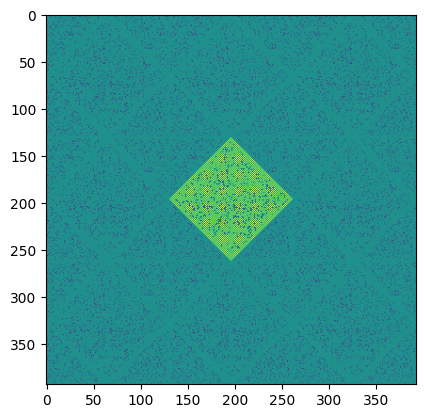

In [8]:
plot_with_extended_graph(extend_factor + extra, steps)

(131, 131)
3947


3947

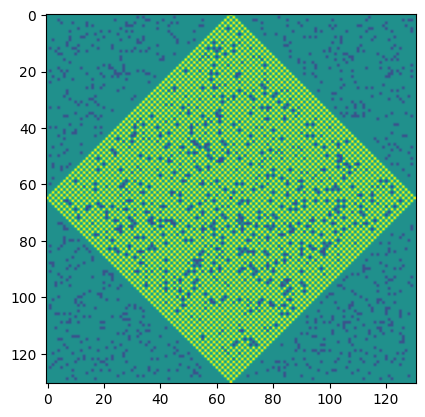

In [9]:
plot_with_extended_graph(extend_factor, steps)

In [10]:
total_pixels = np_text.shape[0] * np_text.shape[1] * extend_factor * extend_factor
shaded_pixels = total_pixels // 2
answer = shaded_pixels - obstacle_counts[steps % 2] * extend_factor * extend_factor
print(total_pixels, shaded_pixels, answer)

17161 8580 7747


In [8]:
steps = 202300
15550 * (steps*steps) + 15656 * (steps) + 3947

636391426712747